In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
flights = pd.read_csv('itineraries.csv')

In [44]:
flights.head()

,origin,destination,date,price,link,carrier,searchDay
0,BCN,BKK,11-07-2023,539.60,https://skyscanner.pxf.io/c/2850210/1103265/13...,Lufthansa,14-01-2023
1,BCN,BKK,11-07-2023,600.60,https://skyscanner.pxf.io/c/2850210/1103265/13...,Lufthansa,15-01-2023
2,BCN,BKK,11-07-2023,400.60,https://skyscanner.pxf.io/c/2850210/1103265/13...,Lufthansa,16-01-2023
3,BCN,BKK,11-07-2023,300.60,https://skyscanner.pxf.io/c/2850210/1103265/13...,Lufthansa,17-01-2023
4,BKK,BCN,21-08-2023,634.98,https://skyscanner.pxf.io/c/2850210/1103265/13...,Etihad Airways,14-01-2023


In [56]:
flights[flights['destination'] == 'KUL']

,origin,destination,date,price,link,carrier,searchDay
2,BCN,KUL,08-07-2023,490.98,https://skyscanner.pxf.io/c/2850210/1103265/13...,Lufthansa,14-01-2023
6,MAD,KUL,11-07-2023,582.99,https://skyscanner.pxf.io/c/2850210/1103265/13...,Emirates,14-01-2023


In [26]:
def plot_price_evolution(df, origin, destination):
    # Filter the DataFrame to only include rows with the given origin and destination
    df_filtered = df[(df['origin'] == origin) & (df['destination'] == destination)]

    # Create a line plot of the 'price' column against the 'searchDay' column
    df_filtered.plot(x='searchDay', y='price', kind='line')

    # Add labels to the x and y axis
    plt.xlabel('Search Day')
    plt.ylabel('Price')

    # Add a title to the plot
    plt.title(f'Price Evolution for {origin} to {destination}')
    plt.grid(True)

    # Show the plot
    plt.show()


In [33]:
def plot_price_evolution_grid(df):
    # Get all unique origin and destination
    origins = df['origin'].unique()
    destinations = df['destination'].unique()
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(nrows=len(destinations), ncols=len(origins), figsize=(15, 10))
    
    for i, origin in enumerate(origins):
        for j, destination in enumerate(destinations):
            # Filter the DataFrame to only include rows with the current origin and destination
            df_filtered = df[(df['origin'] == origin) & (df['destination'] == destination)]
            
            # Create a line plot of the 'price' column against the 'searchDay' column
            df_filtered.plot(x='searchDay', y='price', kind='line', ax=axes[j][i])
            
            # Add labels to the x and y axis
            axes[j][i].set_xlabel('Search Day')
            axes[j][i].set_ylabel('Price')
            
            # Add a title to the plot
            axes[j][i].set_title(f'{origin}-{destination}')
    
    plt.tight_layout()
    # Show the plot
    plt.show()


In [50]:

def plot_price_evolution_by_origin(df):
    # Get all unique origin
    origins = df['origin'].unique()
    print(origins)
    destinations = df['destination'].unique()

    # Create a figure with multiple subplots
    fig, axes = plt.subplots(nrows=len(origins), ncols=1, figsize=(10, 15))
    
    for i, origin in enumerate(origins):
        # Filter the DataFrame to only include rows with the current origin
        df_filtered = df[df['origin'] == origin]
        for destination in destinations:
            # filter the rows for each destination
            df_dest = df_filtered[df_filtered['destination'] == destination]
            # Create a line plot of the 'price' column against the 'searchDay' column
            df_dest.plot(x='searchDay', y='price', kind='line', ax=axes[i], label=destination)
        # Add labels to the x and y axis
        axes[i].set_xlabel('Search Day')
        axes[i].set_ylabel('Price')

        # Add a title to the plot
        axes[i].set_title(f'Price Evolution for {origin}')
        axes[i].legend(loc='upper right')
    plt.tight_layout()    
    # Show the plot
    plt.show()


['BCN' 'DPS' 'KUL' 'MAD']


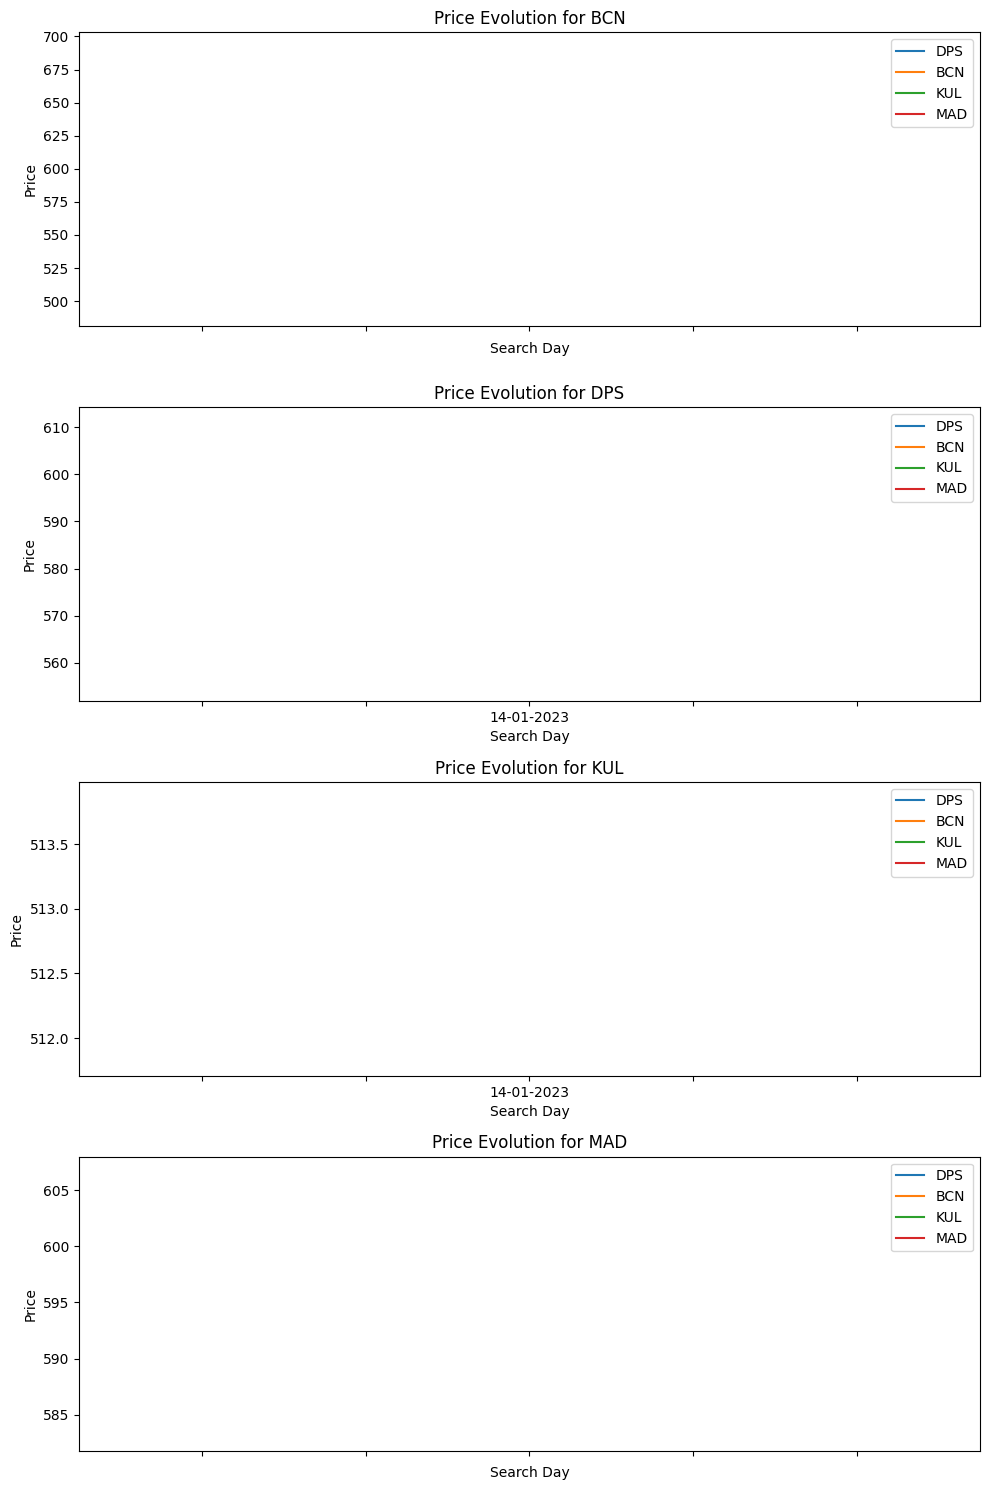

In [53]:
# plot_price_evolution(flights, 'BCN', 'BKK')
# plot_price_evolution(flights, 'BKK', 'BCN')
plot_price_evolution_by_origin(flights)